# Importing the necessary packages

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Extracting the data

In [45]:
data = pd.read_csv('E:/Random Forest Project 9 & 10/fraud_check.csv')
data['Taxable.Income'] = data['Taxable.Income'].apply(lambda x:'Risky' if x<= 30000 else 'Good')

In [46]:
data

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,Good,50047,10,YES
1,YES,Divorced,Good,134075,18,YES
2,NO,Married,Good,160205,30,YES
3,YES,Single,Good,193264,15,YES
4,NO,Married,Good,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,Good,39492,7,YES
596,YES,Divorced,Good,55369,2,YES
597,NO,Divorced,Good,154058,0,YES
598,YES,Married,Good,180083,17,NO


In [47]:
data['Undergrad'] = data['Undergrad'].map({'YES': 1, 'NO': 0})
data['Urban'] = data['Urban'].map({'YES': 1, 'NO': 0})

In [48]:
df = data.copy()

In [49]:
dumm = pd.get_dummies(df['Taxable.Income'])
dumm1 = pd.get_dummies(df['Marital.Status'])
df = pd.concat([df, dumm, dumm1], axis =1)

In [50]:
df1 = df.drop('Marital.Status', axis = 1)
df1 = df1.drop('Taxable.Income', axis=1)

In [51]:
df1

,Undergrad,City.Population,Work.Experience,Urban,Good,Risky,Divorced,Married,Single
0,0,50047,10,1,1,0,0,0,1
1,1,134075,18,1,1,0,1,0,0
2,0,160205,30,1,1,0,0,1,0
3,1,193264,15,1,1,0,0,0,1
4,0,27533,28,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,1,0,0
596,1,55369,2,1,1,0,1,0,0
597,0,154058,0,1,1,0,1,0,0
598,1,180083,17,0,1,0,0,1,0


In [52]:
df1.columns

Index(['Undergrad', 'City.Population', 'Work.Experience', 'Urban', 'Good',
       'Risky', 'Divorced', 'Married', 'Single'],
      dtype='object')

# EDA

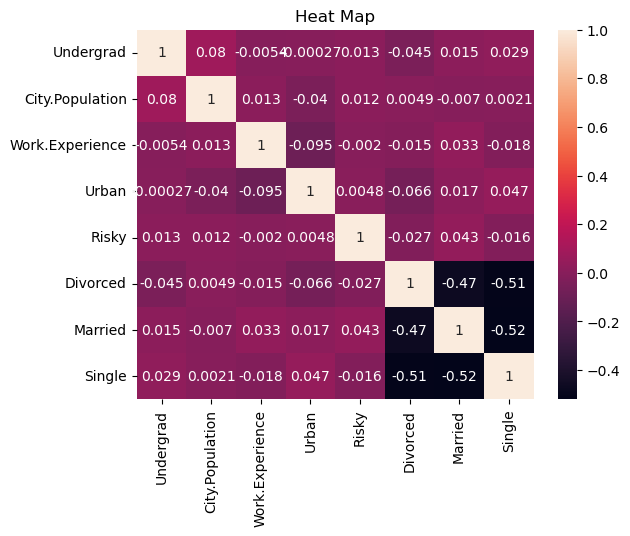

In [53]:
path = 'E:/Random Forest Project 9 & 10'
file_path = os.path.join(path, 'Heat_map.png')
cor = df1[['Undergrad', 'City.Population', 'Work.Experience', 'Urban',
       'Risky', 'Divorced', 'Married', 'Single']].corr()
sns.heatmap(cor, annot=True)
plt.title('Heat Map')
plt.savefig(file_path)
plt.show()

In [54]:
summary_stats = df.describe()
summary_stats

,Undergrad,City.Population,Work.Experience,Urban,Good,Risky,Divorced,Married,Single
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,0.520000,108747.368333,15.558333,0.503333,0.793333,0.206667,0.315000,0.323333,0.361667
std,0.500017,49850.075134,8.842147,0.500406,0.405252,0.405252,0.464903,0.468139,0.480884
min,0.000000,25779.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,66966.750000,8.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,106493.500000,15.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,150114.250000,24.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,199778.000000,30.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


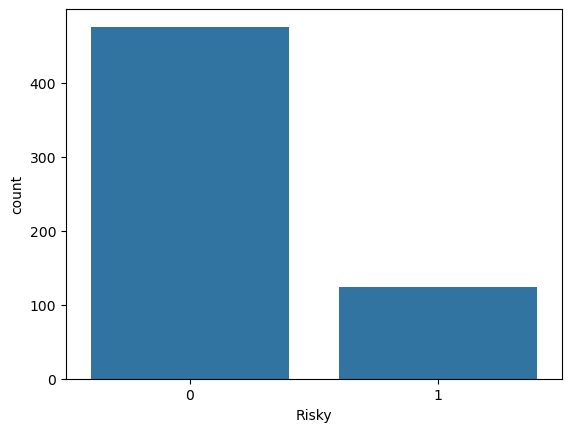

In [55]:
sns.countplot(x='Risky', data=df1)
plt.show()

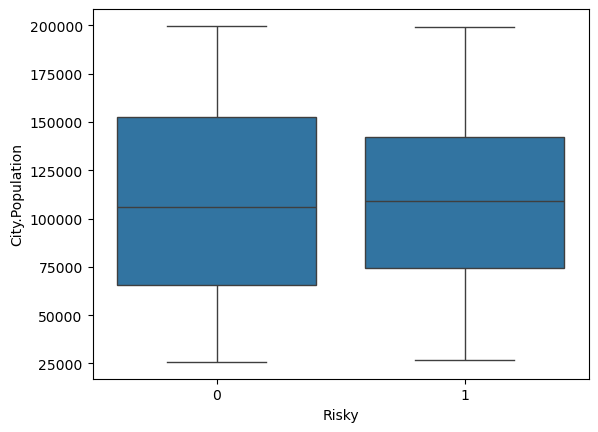

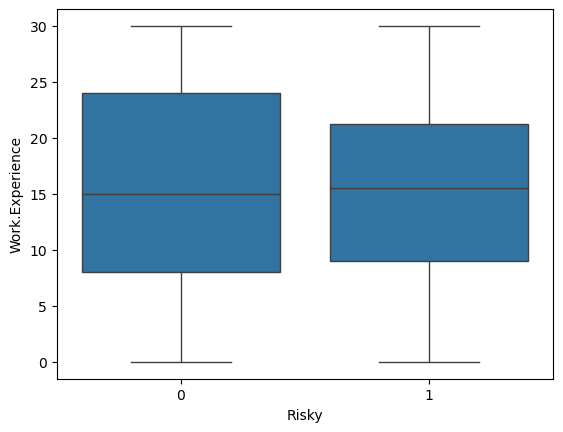

In [56]:
numerical_features = ['City.Population', 'Work.Experience']
for feature in numerical_features:
    sns.boxplot(x='Risky', y=feature, data=df)
    plt.show()

In [57]:
# Display missing values
missing_values = df.isnull().sum()
print(missing_values)

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
Good               0
Risky              0
Divorced           0
Married            0
Single             0
dtype: int64


In [58]:
df1

,Undergrad,City.Population,Work.Experience,Urban,Good,Risky,Divorced,Married,Single
0,0,50047,10,1,1,0,0,0,1
1,1,134075,18,1,1,0,1,0,0
2,0,160205,30,1,1,0,0,1,0
3,1,193264,15,1,1,0,0,0,1
4,0,27533,28,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...
595,1,39492,7,1,1,0,1,0,0
596,1,55369,2,1,1,0,1,0,0
597,0,154058,0,1,1,0,1,0,0
598,1,180083,17,0,1,0,0,1,0


In [60]:
path = 'E:/Random Forest Project 9 & 10/fraud_check_data.csv'
df1.to_csv(path, index= False)